<a href="https://colab.research.google.com/github/khaledhassann/Titanic_ML_project/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing the Titanic

Welcome to this notebook that analyzes the titanic incident. Our aim from this project is to analyze the Titanic dataset containing all the data about the people who boarded the titanic.
***
The first part will be concerned with analyzing the data and getting insights from it so we can better train our models in the second part.

The second part will be concerned with creating 5 ML models to predict the survival of any individual that would've boarded the Titanic.


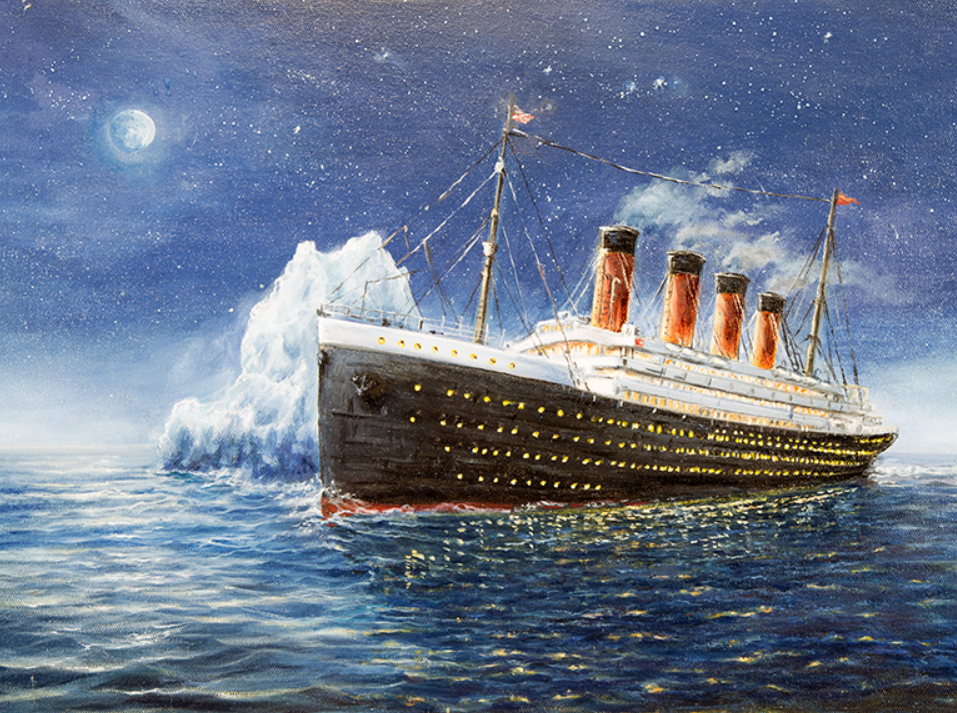

# Importing numpy and pandas library

In [1]:
# Importing libraries to start processing the data
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

# Importing libraries to know and then split the data and create the pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Importing libraries to get the optimal hyper-parameters for the models
from sklearn.model_selection import GridSearchCV

# Importing libraries to run the models themselves
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Importing libraries to measure models performances
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Uploading data to colab

In [2]:
train_file = files.upload()
test_file = files.upload()

df = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Saving train.csv to train (1).csv


Saving test.csv to test (1).csv


In [3]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Getting to know the data

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
missing_percent = (df.Age.isnull().sum() / df.Age.count())
missing_percent

0.24789915966386555

We are missing nearly 25% of the age data for our individuals

## Here we can see the correlation between the features in our dataset
***
The darker blue color means positive correlation and the brighter yellow means a negative correlation

<ipython-input-8-2e17e8dfad0d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu")


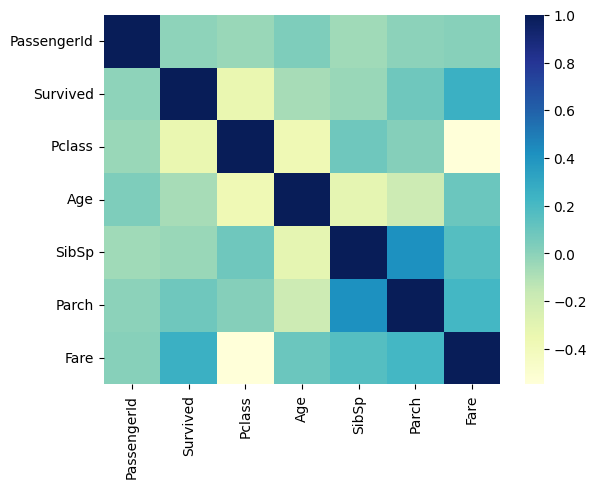

In [8]:
sns.heatmap(df.corr(), cmap="YlGnBu")
plt.show()

We are only concerned with correlation between the features and survival on the y-axis.
From the data we deduce the following:


1.   PassengerId is not at all correlated to Survival
2.   We ignore the correlation between survival and survival
3.   Pclass is negatively correlated with survival, this shows that people with higher Pclass tickets had higher survival rates.
4.   Age, Siblings and spouses didn't really have an impact on survival
5.   Parents or children (family members) with the individual had a slightly positive correlation with the survival chance.
6.   Fare had a positive correlation with survival, this makes sense since we can also see from the graph that fare and Pclass had a negative correlation; which means the higher the fare the lower the class number indicating higher socio-economic status.





## Splitting data to training and testing data


*   We will split the data into two partitions, train and test.
*   Also, we'll make sure that the data in each partition is distributed equally so we don't have any problems with the data being split randomly causing on data partition to be more skewed in the key features: Survived, Pclass, Sex.



In [9]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)
for train_indices, test_indices in split.split(df, df[["Survived", "Pclass", "Sex"]]):
  train_set = df.loc[train_indices]
  test_set = df.loc[test_indices]

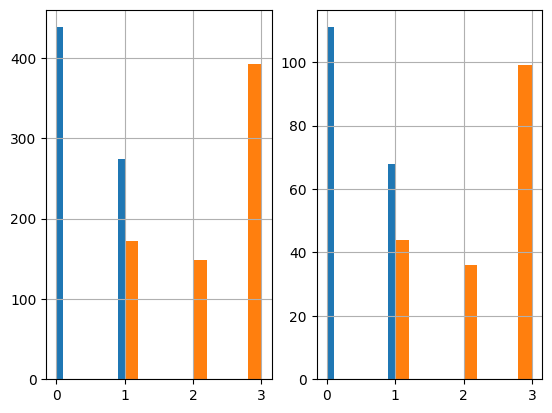

In [10]:
plt.subplot(1,2,1)
train_set['Survived'].hist()
train_set['Pclass'].hist()

plt.subplot(1,2,2)
test_set['Survived'].hist()
test_set['Pclass'].hist()

plt.show()

# Now we're going to create a pipeline that prepares the dataset
### We're going to pass the data through 3 stages:

1.  Completing missing data
2.  Encoding non-numerical data
3.  Dropping features we no longer need
***
Then we are going to run the dataset through the pipeline and get the ready-to-use data in the end.

## Completing the dataset
Filling out all the missing values of important columns

In [11]:
class AgeImputer(BaseEstimator, TransformerMixin):
  # fit function only has to return the BaseEstimator itself
  def fit(self, X, y=None):
    return self

  # transform does the actual transformation itself
  def transform(self, X):
    imputer = SimpleImputer(strategy="mean")
    X['Age'] = imputer.fit_transform(X[['Age']])
    return X

## Next we need to encode the non-numerical data
String data cannot be used in models or in graphs so we need to perform One Hot Encoding, to transform these data into numbers that convey the same meaning

In [12]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    encoder = OneHotEncoder()
    matrix = encoder.fit_transform(X[['Embarked']]).toarray()

    column_names = ['C', 'S', 'Q', 'N']

    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]

    matrix = encoder.fit_transform(X[['Sex']]).toarray()
    column_names = ['Female', 'Male']
    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]


    return X

## Then we drop all the features that we don't need

*   We are dropping embarked since we replaced it by columns: C, S, Q with binary values
*   Name because it is irrelevant to the survival of an individual
*   Ticket because the ticket number is also non-relevant
*   Cabin number is also irrelevant to the survival
*   We dropped Sex since we replaced it with: Females and Males with binary values
*   N because it can happen in the embarked column and it has no particular importance

In [13]:
class FeatureDropper(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [14]:
pipeline = Pipeline([("ageImputer", AgeImputer()),
                     ("featureEncoder", FeatureEncoder()),
                     ("featureDropper", FeatureDropper())])

## Finally, we run the data through the pipeline

In [15]:
train_set = pipeline.fit_transform(train_set)

In [16]:
train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
301,302,1,3,29.480018,2,0,23.2500,0.0,1.0,0.0,0.0,1.0
45,46,0,3,29.480018,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
805,806,0,3,31.000000,0,0,7.7750,0.0,0.0,1.0,0.0,1.0
310,311,1,1,24.000000,0,0,83.1583,1.0,0.0,0.0,1.0,0.0
168,169,0,1,29.480018,0,0,25.9250,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
806,807,0,1,39.000000,0,0,0.0000,0.0,0.0,1.0,0.0,1.0
248,249,1,1,37.000000,1,1,52.5542,0.0,0.0,1.0,0.0,1.0
760,761,0,3,29.480018,0,0,14.5000,0.0,0.0,1.0,0.0,1.0
378,379,0,3,20.000000,0,0,4.0125,1.0,0.0,0.0,0.0,1.0


In [17]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 301 to 83
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


No more missing values in the dataset

## Scaling the data

*   The last thing we do before we feed our data to the models is scale them to a normal distribution to improve model performance and ensure all features have consistent units to avoid any biases in our models' performance.

In [18]:
X = train_set.drop(['Survived'], axis=1)
y = train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy() # scaler returns numpy arrays so y_data also needs to be a numpy array

In [19]:
test_set = pipeline.fit_transform(test_set)
X_test = test_set.drop(['Survived'], axis=1)
y_test = test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

# Support Vector Machine classifier

### Determining the optimal hyper-parameters first for the model

In [20]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'svm__C': [0.1, 1, 10, 100],        # Regularization parameter
    'svm__gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'svm__kernel': ['linear', 'rbf']    # Kernel type
}

pipeline_svm = Pipeline([('svm', SVC())])


# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline_svm, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_data, y_data)

# Display the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters:  {'svm__C': 1, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Best Accuracy:  0.8132177681473456


### Running the model with the hyper-parameters obtained from grid search

In [21]:
# creating the model
model = SVC (kernel = 'rbf', C = 1, gamma=0.1, probability=True)

# training the model
model.fit(X_data,y_data)

# using the model for predictions
predictions = model.predict(X_data_test)

#probability predictions for the ROC/AUC curve
y_score_svc = model.predict_proba(X_data_test)[:, 1]

# checking the model accuracy
print(accuracy_score(y_data_test, predictions))

# Display additional metrics
print("Classification Report:")
print(classification_report(y_data_test, predictions))

0.8324022346368715
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       111
           1       0.84      0.69      0.76        68

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



### Plotting the ROC/AUC curve

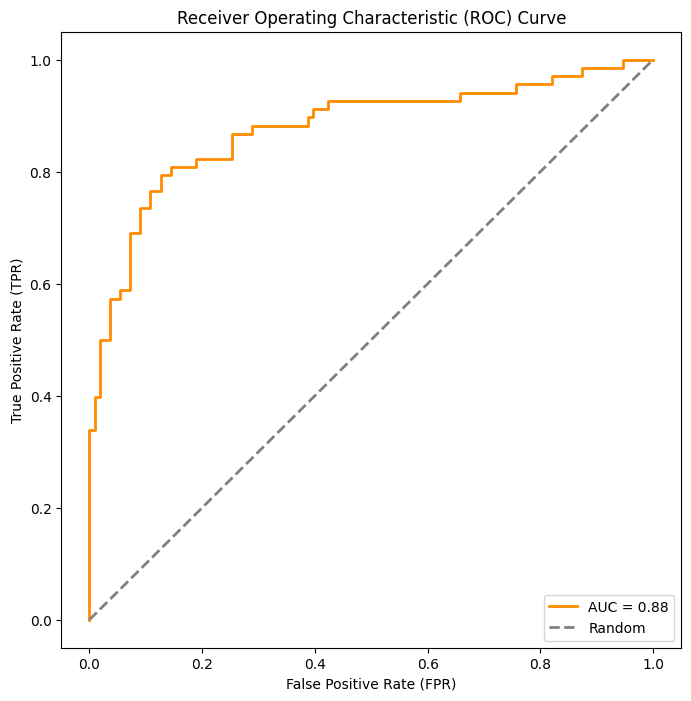

In [22]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_data_test, y_score_svc)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2, label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# K-Nearest Neighbors classifier

### Determining the optimal hyper-parameters first for the model



In [23]:
pipeline_knn = Pipeline([
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],      # Number of neighbors
    'knn__weights': ['uniform', 'distance'],  # Weighting strategy
    'knn__p': [1, 2]                         # Power parameter for Minkowski distance
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline_knn, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_data, y_data)

# Display the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters:  {'knn__n_neighbors': 7, 'knn__p': 2, 'knn__weights': 'uniform'}
Best Accuracy:  0.8020191076529105


### Running the model with the hyper-parameters obtained from grid search

In [24]:
# now we train the K-Nearest neighbors model on our clean train data and run it to predict the survival of our clean test data
model = KNeighborsClassifier(n_neighbors = 7, p=1, weights='distance')
model.fit(X_data,y_data)

# using the model for predictions
predictions = model.predict(X_data_test)

#probability predictions for the ROC/AUC curve
y_score_knn = model.predict_proba(X_data_test)[:, 1]

print(accuracy_score(y_data_test, predictions))

# Display additional metrics
print("Classification Report:")
print(classification_report(y_data_test, predictions))

0.8268156424581006
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       111
           1       0.80      0.72      0.76        68

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



### Plotting the ROC/AUC curve

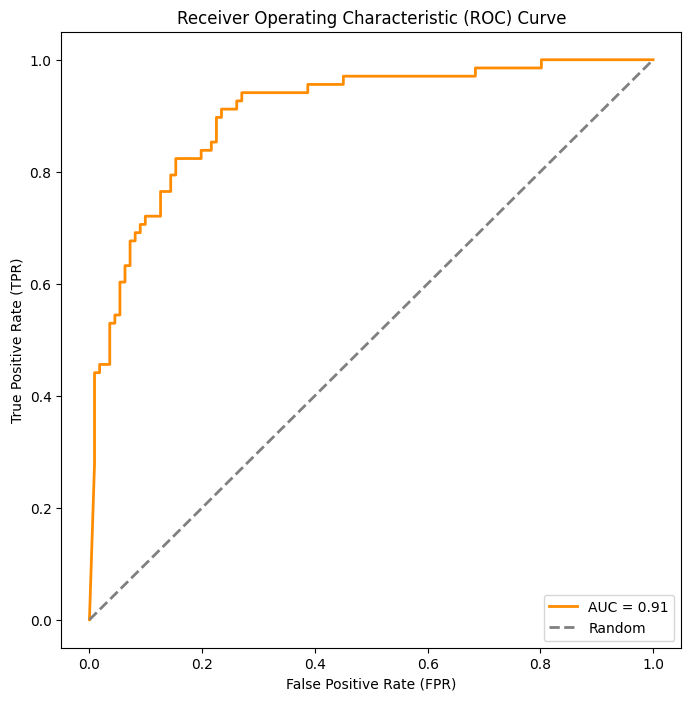

In [25]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_data_test, y_score_knn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2, label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Bayes Classifier

### Determining the optimal hyper-parameters first for the model

In [ ]:
pipeline_nb = Pipeline([
    ('nb', GaussianNB())
])

# Define the parameter grid for hyperparameter tuning
param_grid_nb = {
    'nb__priors': [None, [0.5, 0.5], [0.7, 0.3]]  # Try different priors
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline_nb, param_grid_nb, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_data, y_data)

# Display the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

### Running the model with the hyper-parameters obtained from grid search

In [27]:
# creating the model
naive_bayes_model = GaussianNB(priors=[0.7, 0.3])

# training the model
naive_bayes_model.fit(X_data, y_data)

# using the model for predictions
predictions = naive_bayes_model.predict(X_data_test)

#probability predictions for the ROC/AUC curve
y_score_nb = model.predict_proba(X_data_test)[:, 1]

# check model accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display additional metrics
print("Classification Report:")
print(classification_report(y_data_test, predictions))

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       111
           1       0.76      0.71      0.73        68

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### Plotting the ROC/AUC curve

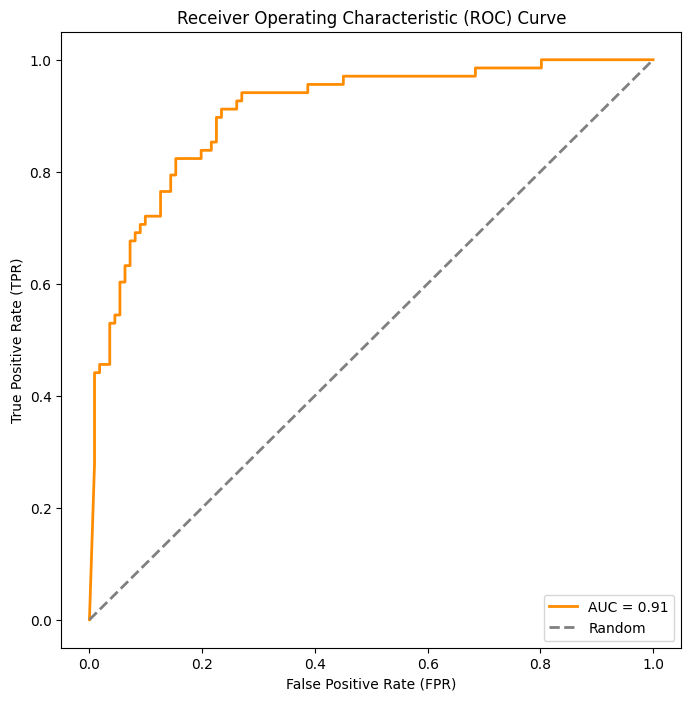

In [28]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_data_test, y_score_nb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2, label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Now we compare between SVM, KNN, and GNB

## First, we compare accuracies

* The highest accuracy was achieved by the SVM model at 84%, followed by the KNN model at 83%, then the GNB at 78%.

***
## Comparing the classification report we see that

1.  Concerning precision:
  1.   For dead (0 in survived), all 3 models avoided false positives at a rate of 83%.
  2.   For survivors (1 in survived), the SVM model excelled at avoiding false positives at a rate of 87%, while KNN got a rate of 83%, and the least of them all was the GNB 70%.
2. Concerning recall:
  1.  For dead, the SVM again excelled at 94% of all positives samples identified, while KNN came in second at 91%, and GNB at only 81%.
  2.  For survivors, we see quite the opposite with the GNB model getting 74% of all positive samples identified, KNN at 71%, and SVM at only 69%.
  3.  So clearly the models are better at identifying individuals that would've died than those that would've survived.
3. Concerning f1 score:
  1. F1 score is a harmonic mean between the precision and recall to decide the overall model performance if you're not particularly interested in one of the metrics.
  2. For dead, SVM takes first place with 88%, then KNN at 87%, and lastly GNB at 82%.
  3. For survivors, SVM takes first place again with 77%, then KNN at 76%, and lastly GNB at 72%.
4. Concerning support:
  1. Support is the number of instances that were in the test data to produce these statistics.



## A quick explanation of the ROC/AUC curves

* ROC/AUC curves are mainly based on 2 metrics Sensitivity and Specificity.
* Sensitivity tells us which individuals that lived were correctly identified.
* Specificity tells us which individuals that didn't live were correctly identified.
* ROC/AUC curves plots the True Positive Rate (Sensitivity) on the y-axis, and the False Positive Rate (1-Specificity) on the x-axis. Then each point on the graph represents a threshold.
* Each threshold can identify TPR at a specific probability but the trade-off is the probability of a FPR. You can then choose which threshold to use according to how important is a TP to you and how damaging is a FP to you.
* As for the AUC value, it means the Area Under Curve and its main use is to summarize the ROC graph.

***

## Comparing models based on the ROC/AUC curves

* From the graphs we can see that the highest AUC value is that of the SVC model. That is also backed up by the Classification report as it ranked higher than the two other models in almost every metric.
* This means that the SVM can detect more True Positives with less False Positives giving us a more reliable model.

# Finally a word about the data

* The number of people that died in the titanic is considerably larger than that of the survivors. This justifies the lower scores on every statistic in the classification report for survivors.
* For visualization sake, imagine you were tasked to find a needle in a hay stack. You'd probably have a near perfect rate of classifying hay particles as hay and a not so perfect score classifying needle particles as needles.

![link text](https://www.englishtutoronline.com/english/wp-content/uploads/2014/01/needle_in_the_haystack.jpg)

# PHASE 2 START

# Decision Trees (RandomForrest Classifier)

### Determining the optimal hyper-parameters first for the model

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([
    ('rf', RandomForestClassifier())
])

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],            # Number of trees
    'rf__max_depth': [None, 10, 20, 30],            # Maximum depth of the tree
    'rf__min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'rf__min_samples_leaf': [1, 2, 4],              # Minimum number of samples required to be at a leaf node
    'rf__max_features': ['sqrt', 'log2']   # Maximum number of features considered for splitting a node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_data, y_data)

# Display the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters:  {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 5, 'rf__n_estimators': 50}
Best Accuracy:  0.823076923076923


### Running the model with the hyper-parameters obtained from grid search

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# creating the model
model = RandomForestClassifier(n_estimators=200, max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, random_state=1)

# training the model
model.fit(X_data, y_data)

# using the model for predictions
predictions = model.predict(X_data_test)

# check model accuracy
print(accuracy_score(y_data_test, predictions))

# Display additional metrics
print("Classification Report:")
print(classification_report(y_data_test, predictions))

0.8491620111731844
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       111
           1       0.87      0.71      0.78        68

    accuracy                           0.85       179
   macro avg       0.86      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



# Multi-Layer Perceptron

### Determining the optimal hyper-parameters first for the model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

pipeline_mlp = Pipeline([
    ('mlp', MLPClassifier())
])

# Define the parameter grid for hyperparameter tuning
param_grid_mlp = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'mlp__activation': ['relu', 'tanh', 'logistic'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate_init': [0.001, 0.01, 0.1],
    'mlp__max_iter': [500, 1000],  # Increase max_iter
    'mlp__batch_size': [32, 64, 128],  # Experiment with different batch sizes
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline_mlp, param_grid_mlp, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_data, y_data)

# Display the best parameters and corresponding accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

### Running the model with the hyper-parameters obtained from the grid search

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize and train the MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_data, y_data)

# Make predictions on the test set
predictions = mlp_model.predict(X_data_test)

# Evaluate the model
accuracy = accuracy_score(y_data_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display additional metrics
print("Classification Report:")
print(classification_report(y_data_test, predictions))